# Natural language understanding

Human language is about communication: it's more than just the bag of words.  Natural Language Processing (NLP) is the process of understanding the meaning of text, using its grammar. 

If you get interested in this, one of the best places to start is the NLTK book, at http://www.nltk.org/book/

We'll be using the NLTK library and corpora. Corpora = lists of words, like stopwords, stemwords, grammar etc. for multiple languages. 

## Get NLTK resources

WARNINGS: 

* You will have to conda install nltk before you can run this cell
* And even when you ahve the NLTK library, you won't be able to run the cells below without the NLTK corpora. 

Run the cell below just once.  
* When you run nltk.download(), a popup window will appear. 
* Click on the "models" tab, then "punkt" then the "download" button

If you want more, try clicking on "book" then "download".  If you ever wanted to have the whole of Basque grammar, then click around the tabs in this popup window: this is the place to get it!

In [1]:
# import nltk
# nltk.download() #Uncomment this before running the cell

## Get dataset

Notice how we process this text differently to the bag of words: we convert it into all the words in the sipa text, in the order they appear in the text.  The function nltk.text.Text() converts this list into an object that we can use to ask natural language questions about the text.

In [2]:
from nltk import word_tokenize
from nltk.text import Text

fsipa = open('example_data/sipatext.txt', 'r')
sipatext = fsipa.read()
fsipa.close()

sipawords = word_tokenize(sipatext)
textlist = Text(sipawords)
print('{}'.format(sipawords))
print('{}'.format(textlist))

['The', 'School', 'of', 'International', 'and', 'Public', 'Affairs', 'at', 'Columbia', 'University', '(', 'also', 'known', 'at', 'SIPA', ')', 'is', 'a', 'public', 'policy', 'and', 'international', 'affairs', 'school', 'and', 'one', 'of', 'Columbia', "'s", 'graduate', 'and', 'professional', 'schools', '.', 'Located', 'on', 'Columbia', "'s", 'Morningside', 'Heights', 'campus', 'in', 'the', 'Borough', 'ofManhattan', ',', 'in', 'New', 'York', 'City', ',', 'the', 'school', 'has', 'more', 'than', '19,000', 'alumni', 'in', 'more', 'than', '150', 'countries', '.', 'SIPA', "'s", 'alumni', 'include', 'former', 'heads', 'of', 'state', ',', 'business', 'leaders', ',', 'journalists', ',', 'diplomats', ',', 'and', 'elected', 'representatives', '.', 'Many', 'graduates', 'reach', 'the', 'upper', 'echelons', 'of', 'central', 'banks', 'and', 'treasuries', ',', 'others', 'go', 'to', 'energy', 'companies', ',', 'non-for-profits', 'and', 'social', 'enterprises', '.', '[', '1', ']', 'Half', 'of', 'SIPA’s', 

## Get information about this dataset

* The concordance() function displays all the occurances of a given word, with the words around it.
* the similar() function displays all words that appear in similar contexts (has the same words either side of it) to a given word.
* common_contexts(word_list) tells you which pairs of words occur around all the words in word_list
* dispersion_plot() shows you *where* in a text given words appear

In [3]:
textlist.concordance('school')

Displaying 7 of 7 matches:
                                    School of International and Public Affairs
ic policy and international affairs school and one of Columbia 's graduate and
fManhattan , in New York City , the school has more than 19,000 alumni in more
rs on international relations . The school offers two traditional two-year mas
ual degree programs with the London School of Economics and Political Science 
 Paris ( Sciences Po ) , the Hertie School of Governance in Berlin , the Unive
rsity of Tokyo and the Lee Kuan Yew School of Public Policy at the National Un


In [4]:
textlist.similar('school')

university


In [5]:
textlist.common_contexts(['school', 'university'])

the_of


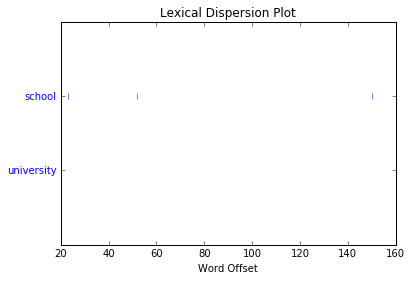

In [6]:
%matplotlib inline
textlist.dispersion_plot(['school', 'university'])

### Aside: the NLTK test datasets

nltk.book contains a set of example texts.  These are large, and can be <del>great fun </del> very instructive to play with. 

* Text1: Moby Dick by Herman Melville 1851
* Text2: Sense and Sensibility by Jane Austen 1811
* Text3: The Book of Genesis
* Text4: Inaugural Address Corpus
* Text5: Chat Corpus
* Text6: Monty Python and the Holy Grail
* Text7: Wall Street Journal
* Text8: Personals Corpus
* Text9: The Man Who Was Thursday by G . K . Chesterton 1908

If you're playing with Text2, this might help: http://www.sparknotes.com/lit/sensibility/characters.html

In [7]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


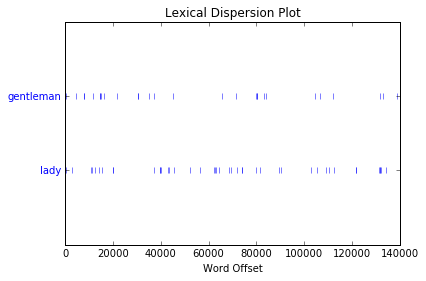

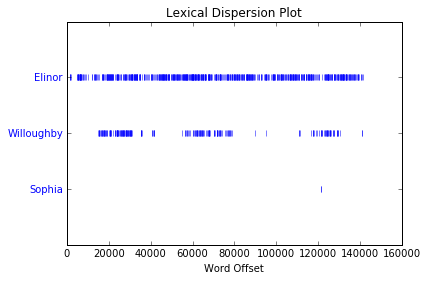

<Text: Sense and Sensibility by Jane Austen 1811>

In [8]:
text2.dispersion_plot(['gentleman', 'lady'])
text2.dispersion_plot(['Elinor', 'Willoughby', 'Sophia'])
text2

## Word meanings: WordNet

WordNet is a thesaurus-style collection of English words, and is included in the NLTK distribution.

In [9]:
from nltk.corpus import wordnet as wn

word = 'class'
synset = wn.synsets(word)
print('Synset: {}\n'.format(synset))

for i in range(len(synset)):
    print('Meaning {}: {} {}'.format(i, synset[i].lemma_names(), synset[i].definition()))

Synset: [Synset('class.n.01'), Synset('class.n.02'), Synset('class.n.03'), Synset('course.n.01'), Synset('class.n.05'), Synset('class.n.06'), Synset('class.n.07'), Synset('class.n.08'), Synset('classify.v.01')]

Meaning 0: ['class', 'category', 'family'] a collection of things sharing a common attribute
Meaning 1: ['class', 'form', 'grade', 'course'] a body of students who are taught together
Meaning 2: ['class', 'stratum', 'social_class', 'socio-economic_class'] people having the same social, economic, or educational status
Meaning 3: ['course', 'course_of_study', 'course_of_instruction', 'class'] education imparted in a series of lessons or meetings
Meaning 4: ['class', 'division'] a league ranked by quality
Meaning 5: ['class', 'year'] a body of students who graduate together
Meaning 6: ['class'] (biology) a taxonomic group containing one or more orders
Meaning 7: ['class'] elegance in dress or behavior
Meaning 8: ['classify', 'class', 'sort', 'assort', 'sort_out', 'separate'] arran

## Word trees: converting sentences into logic

You don't have to understand how this works (but if you want to, the NLTK book listed above is exactly where you need to be), just understand that sentences can be parsed and interpreted as the types of logics used in robotics and artificial intelligence.  the logic below says that for all dogs, a bone exists and is given to the dogs by Angus.

In [14]:
from nltk import load_parser
parser = load_parser('grammars/book_grammars/simple-sem.fcfg', trace=0)
sentence = 'Angus gives a bone to every dog'
tokens = sentence.split()
for tree in parser.parse(tokens):
    print(tree.label()['SEM'])

all z6.(dog(z6) -> exists z5.(bone(z5) & give(angus,z5,z6)))


In [16]:
print('{}'.format(tree))

(S[SEM=<all z6.(dog(z6) -> exists z5.(bone(z5) & give(angus,z5,z6)))>]
  (NP[-LOC, NUM='sg', SEM=<\P.P(angus)>]
    (PropN[-LOC, NUM='sg', SEM=<\P.P(angus)>] Angus))
  (VP[NUM='sg', SEM=<\x.all z6.(dog(z6) -> exists z5.(bone(z5) & give(x,z5,z6)))>]
    (DTV[NUM='sg', SEM=<\Y X x.X(\z.Y(\y.give(x,y,z)))>, TNS='pres']
      gives)
    (NP[NUM='sg', SEM=<\Q.exists x.(bone(x) & Q(x))>]
      (Det[NUM='sg', SEM=<\P Q.exists x.(P(x) & Q(x))>] a)
      (Nom[NUM='sg', SEM=<\x.bone(x)>]
        (N[NUM='sg', SEM=<\x.bone(x)>] bone)))
    (PP[SEM=<\Q.all x.(dog(x) -> Q(x))>, +TO]
      (P[+to] to)
      (NP[NUM='sg', SEM=<\Q.all x.(dog(x) -> Q(x))>]
        (Det[NUM='sg', SEM=<\P Q.all x.(P(x) -> Q(x))>] every)
        (Nom[NUM='sg', SEM=<\x.dog(x)>]
          (N[NUM='sg', SEM=<\x.dog(x)>] dog))))))
